## VIDEO GAMES DATASET

* Rank - Ranking of overall sales

* Name - The games name

* Platform - Platform of the games release (i.e. PC,PS4, etc.)

* Year - Year of the game's release

* Genre - Genre of the game

* Publisher - Publisher of the game

* NA_Sales - Sales in North America (in millions)

* EU_Sales - Sales in Europe (in millions)

* JP_Sales - Sales in Japan (in millions)

* Other_Sales - Sales in the rest of the world (in millions)

* Global_Sales - Total worldwide sales.

# Importación de librerías

In [68]:
# Tratamiento de datos
import pandas as pd 
import pymysql
import mysql.connector
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Evaluar linealidad de las relaciones entre las variables
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

#Bases de datos
from sqlalchemy import create_engine, text
from sqlalchemy import inspect

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")


In [69]:
#importación de librerías personales

import funciones_estadistica as estadistica
import funciones_limpieza as limpieza
import funciones_visualizacion as visualizacion
import funciones_base_datos as bbdd

# VISUALIZACIÓN Y LIMPIEZA

In [70]:
df_games = pd.read_csv('vgsales.csv')

In [71]:
visualizacion.extract_data(df_games)

INFORMACIÓN SOBRE COLUMNAS
  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
  
--------------------------------------------------
  
VISUALIZACIÓN DE NULOS
  
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales    

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [72]:
df_games['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [73]:
limpieza.cambiar_a_entero(df_games, 'Year')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  Int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [74]:
visualizacion.porcentaje_nulos(df_games)

,index,perc_nulos
0,Year,1.632727
1,Publisher,0.349440


In [75]:
# Miramos la proporción de valores entre cada catgoría de las variables categóricas.

print(f"La distribución de las categorías para la columna", 'Publisher')
display(df_games['Publisher'].value_counts() / df_games.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
print("........................")

La distribución de las categorías para la columna Publisher


Publisher
Electronic Arts                 0.081395
Activision                      0.058742
Namco Bandai Games              0.056151
Ubisoft                         0.055489
Konami Digital Entertainment    0.050127
                                  ...   
Warp                            0.000060
New                             0.000060
Elite                           0.000060
Evolution Games                 0.000060
UIG Entertainment               0.000060
Name: count, Length: 578, dtype: float64

........................


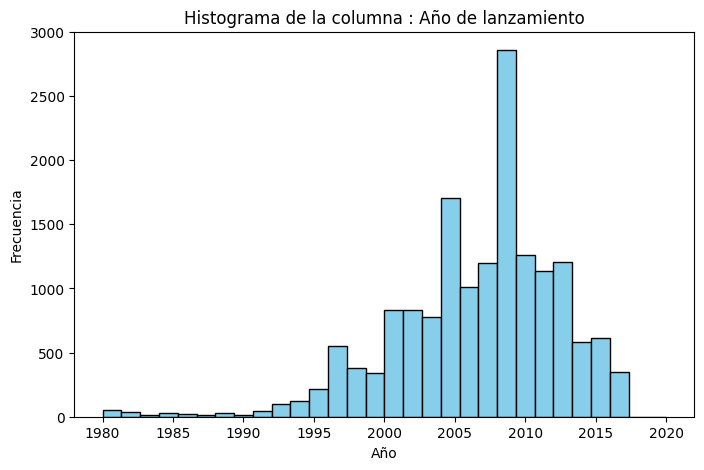

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df_games['Year'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title(f'Histograma de la columna : Año de lanzamiento')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

# Tratamos los nulos
- Publisher: bajo % nulos + no categoría dominante -> imputación con nueva categoría
- Year: bajo % nulos + distribución no simétrica -> imputación con la mediana

In [77]:
# Publisher - Nueva categoría

limpieza.objeto_categoria (df_games, 'Publisher')

In [78]:
# Year - imputación por la mediana

limpieza.mediana_num(df_games, 'Year')

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [79]:
df_games.to_csv('games_clean.csv', index=False)

In [80]:
df_games.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [81]:
df_games.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.0,4151.25,8300.5,12449.75,16600.0
Year,16598.0,2006.416134,5.781686,1980.0,2003.0,2007.0,2010.0,2020.0
NA_Sales,16598.0,0.264667,0.816683,0.0,0.0,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.0,0.0,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.0,0.0,0.0,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.0,0.0,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [82]:
df_games.describe(include = "object").T

,count,unique,top,freq
Name,16598,11493,Need for Speed: Most Wanted,12
Platform,16598,31,DS,2163
Genre,16598,12,Action,3316
Publisher,16598,578,Electronic Arts,1351


In [83]:
# Matriz de correlación
num_vars = df_games.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df_games[num_vars].corr()

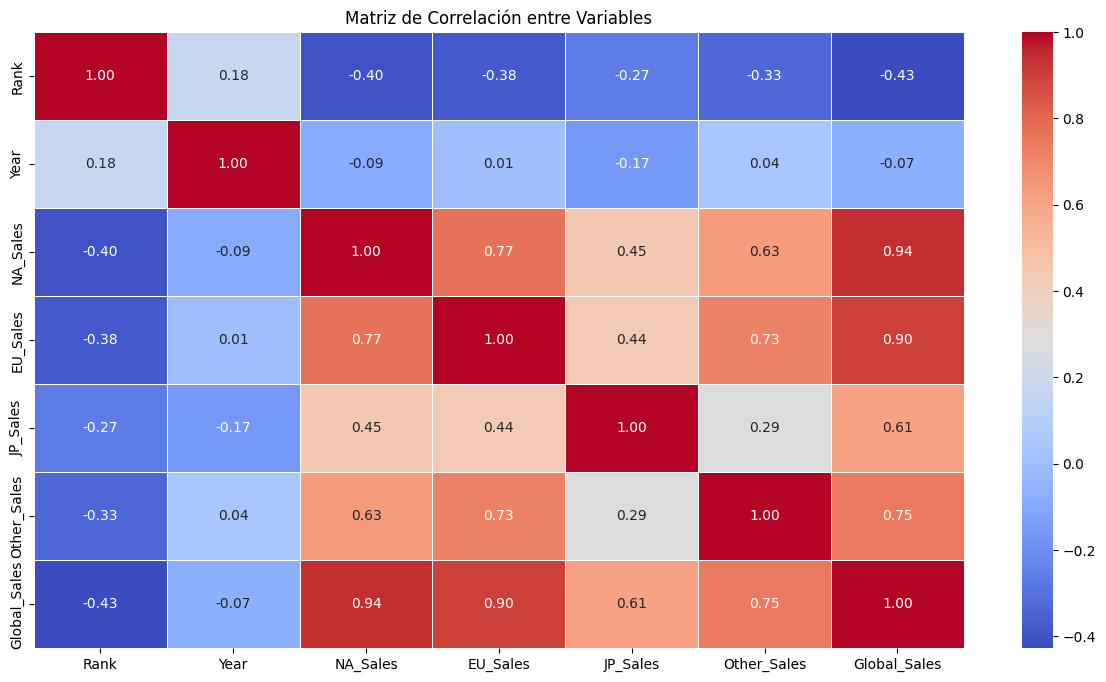

In [84]:
# Visualiza la matriz de correlación utilizando seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

In [85]:
# Comprobamos que los videojuegos repetidos tengan una razón de ser y que no estén duplicados por error

nombres_repetidos = df_games["Name"]=="Need for Speed: Most Wanted"
nombres_repetidos = df_games[nombres_repetidos]
nombres_repetidos

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
252,253,Need for Speed: Most Wanted,PS2,2005,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
498,499,Need for Speed: Most Wanted,PS3,2012,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
1173,1175,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1742,1744,Need for Speed: Most Wanted,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16
2005,2007,Need for Speed: Most Wanted,XB,2005,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
3585,3587,Need for Speed: Most Wanted,GC,2005,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
5900,5902,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
6149,6151,Need for Speed: Most Wanted,WiiU,2013,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28
6278,6280,Need for Speed: Most Wanted,DS,2005,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27


## BASE DE DATOS

In [86]:
from dotenv import load_dotenv
import os

load_dotenv()
password = os.getenv("DB_PASSWORD")


In [87]:
engine, connection = bbdd.conexion(df_games, 'localhost', 'root', password , 'VideoGamesDataBase', 'games_clean.csv')
cursor = connection.cursor()


In [88]:
# Borrar datos previos para asegurar que no hay problemas al ejecutar de nuevo
with engine.begin() as conn:
    inspector = inspect(conn)
    tablas_existentes = inspector.get_table_names()
    tablas = [ "Platform_game", "Publication_game", "Genre_game", "Sales", "Genres", "Publishers", "Platforms","game_info"
    ]
    for tabla in tablas:
        if tabla in tablas_existentes:
            conn.execute(text(f"DELETE FROM {tabla}"))
            print(f"Datos borrados de la tabla: {tabla}")
        else:
            print(f"La tabla '{tabla}' no existe. No se ejecutó DELETE.")



Datos borrados de la tabla: Platform_game
Datos borrados de la tabla: Publication_game
Datos borrados de la tabla: Genre_game
Datos borrados de la tabla: Sales
Datos borrados de la tabla: Genres
Datos borrados de la tabla: Publishers
Datos borrados de la tabla: Platforms
Datos borrados de la tabla: game_info


In [89]:
visualizacion.extract_data(df_games)

INFORMACIÓN SOBRE COLUMNAS
  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  Int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB
None
  
--------------------------------------------------
  
VISUALIZACIÓN DE NULOS
  
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Creación de Tablas en SQL

In [90]:
tablas_sql = {
    "game_info": """
        CREATE TABLE IF NOT EXISTS game_info (
            Ranking INT NOT NULL,
            Name VARCHAR(500),
            PRIMARY KEY (Ranking) 
        )
    """,
    "Platforms": """
        CREATE TABLE IF NOT EXISTS Platforms (
            id_platform INT NOT NULL AUTO_INCREMENT,
            Platform VARCHAR(500) UNIQUE,
            PRIMARY KEY (id_platform) 
        )
    """,
    "Publishers": """
        CREATE TABLE IF NOT EXISTS Publishers (
            id_Publisher INT NOT NULL AUTO_INCREMENT,
            Publisher VARCHAR(500) UNIQUE,
            PRIMARY KEY (id_Publisher) 
        )
    """,
    "Genres": """
        CREATE TABLE IF NOT EXISTS Genres (
            id_Genre INT NOT NULL AUTO_INCREMENT,
            Genre VARCHAR(500) UNIQUE,
            PRIMARY KEY (id_Genre) 
        )
    """,
    "Platform_game": """
        CREATE TABLE IF NOT EXISTS Platform_game (
            Ranking INT NOT NULL,
            id_platform INT NOT NULL,
            CONSTRAINT fk_platform_game_game_info
                FOREIGN KEY (Ranking)
                REFERENCES game_info (Ranking)
                ON DELETE CASCADE
                ON UPDATE CASCADE,
            CONSTRAINT fk_platform_game_platforms
                FOREIGN KEY (id_platform)
                REFERENCES Platforms(id_platform)
                ON DELETE CASCADE
                ON UPDATE CASCADE
        )
    """,
    "Publication_game": """
        CREATE TABLE IF NOT EXISTS Publication_game (
            Ranking INT NOT NULL,
            Publication_date YEAR,
            id_Publisher INT NOT NULL,
            CONSTRAINT fk_publication_game_game_info
                FOREIGN KEY (Ranking)
                REFERENCES game_info (Ranking)
                ON DELETE CASCADE
                ON UPDATE CASCADE,
            CONSTRAINT fk_publication_game_publishers
                FOREIGN KEY (id_Publisher)
                REFERENCES Publishers (id_Publisher)
                ON DELETE CASCADE
                ON UPDATE CASCADE
        )
    """,
    "Genre_game": """
        CREATE TABLE IF NOT EXISTS Genre_game (
            Ranking INT NOT NULL,
            id_Genre INT NOT NULL,
            CONSTRAINT fk_genre_game_game_info
                FOREIGN KEY (Ranking)
                REFERENCES game_info (Ranking)
                ON DELETE CASCADE
                ON UPDATE CASCADE,
            CONSTRAINT fk_genre_game_genres
                FOREIGN KEY (id_Genre)
                REFERENCES Genres (id_Genre)
                ON DELETE CASCADE
                ON UPDATE CASCADE
        )
    """,
    "Sales": """
        CREATE TABLE IF NOT EXISTS Sales (
            Ranking INT,
            NA_Sales FLOAT,
            EU_Sales FLOAT,
            JP_Sales FLOAT,
            Other_Sales FLOAT,
            Global_Sales FLOAT,  -- <- aquí tenías un error tipográfico: FOAT
            CONSTRAINT fk_sales_game_info
                FOREIGN KEY (Ranking)
                REFERENCES game_info (Ranking)
                ON DELETE CASCADE
                ON UPDATE CASCADE
        )
    """
}

for tabla, sql in tablas_sql.items():
    with engine.begin() as conn:
        conn.execute(text(sql))
        print(f"Tabla {tabla} creada exitosamente.")


Tabla game_info creada exitosamente.
Tabla Platforms creada exitosamente.
Tabla Publishers creada exitosamente.
Tabla Genres creada exitosamente.
Tabla Platform_game creada exitosamente.
Tabla Publication_game creada exitosamente.
Tabla Genre_game creada exitosamente.
Tabla Sales creada exitosamente.


## Insertar datos en las tablas de la base de datos

In [91]:
#Tabla game_info

valores_tabla_game_info = []

df_game_info = df_games[['Rank', 'Name']].copy()

for row in df_game_info.itertuples():
    valores_tabla_game_info.append((row.Rank, row.Name))

query_insercion_info = "INSERT IGNORE INTO game_info (Ranking, Name) VALUES (%s, %s)"

try:
    cursor = connection.cursor()  # Usa la conexión que ya devolviste antes
    cursor.executemany(query_insercion_info, valores_tabla_game_info)
    connection.commit()
    print(cursor.rowcount, "registros insertados correctamente 🎉")
except mysql.connector.Error as err:
    print("Error al insertar datos:")
    print(f"Error code {err.errno}")
    print(f"SQLSTATE {err.sqlstate}")
    print(f"MESSAGE {err.msg}")

16598 registros insertados correctamente 🎉


In [92]:
#Tabla Platforms


valores_tabla_Platforms = []

df_Platforms = df_games[['Platform']].copy()
df_Platforms.drop_duplicates(inplace=True)

for row in df_Platforms.itertuples():
    valores_tabla_Platforms.append((row.Platform,))

query_insercion_Platform = "INSERT IGNORE INTO Platforms (Platform) VALUES (%s)"

try:
    cursor = connection.cursor() 
    cursor.executemany(query_insercion_Platform, valores_tabla_Platforms)
    connection.commit()
    print(cursor.rowcount, "registros insertados correctamente 🎉")
except mysql.connector.Error as err:
    print("Error al insertar datos:")
    print(f"Error code {err.errno}")
    print(f"SQLSTATE {err.sqlstate}")
    print(f"MESSAGE {err.msg}")


31 registros insertados correctamente 🎉


In [93]:
#Tabla Publishers


valores_tabla_Publishers = []

df_Publishers = df_games[['Publisher']].copy()
df_Publishers.drop_duplicates(inplace=True)

for row in df_Publishers.itertuples():
    valores_tabla_Publishers.append((row.Publisher,))


query_insercion_Publishers = "INSERT IGNORE INTO Publishers (Publisher) VALUES (%s)"

try:
    cursor = connection.cursor()
    cursor.executemany(query_insercion_Publishers, valores_tabla_Publishers)
    connection.commit()
    print(cursor.rowcount, "registros insertados correctamente 🎉")
except mysql.connector.Error as err:
    print("Error al insertar datos:")
    print(f"Error code {err.errno}")
    print(f"SQLSTATE {err.sqlstate}")
    print(f"MESSAGE {err.msg}")

578 registros insertados correctamente 🎉


In [94]:
#Tabla Genres


valores_tabla_Genres = []

df_Genres = df_games[['Genre']].copy()
df_Genres.drop_duplicates(inplace=True)

for row in df_Genres.itertuples():
    valores_tabla_Genres.append((row.Genre,))


query_insercion_Genres = "INSERT IGNORE INTO Genres (Genre) VALUES (%s)"

try:
    cursor = connection.cursor()
    cursor.executemany(query_insercion_Genres, valores_tabla_Genres)
    connection.commit()
    print(cursor.rowcount, "registros insertados correctamente 🎉")
except mysql.connector.Error as err:
    print("Error al insertar datos:")
    print(f"Error code {err.errno}")
    print(f"SQLSTATE {err.sqlstate}")
    print(f"MESSAGE {err.msg}")

12 registros insertados correctamente 🎉


In [95]:
#Tabla Platform_game


df_platforms_sql = pd.read_sql("SELECT id_platform, Platform FROM Platforms", con=engine)

#Unimos el DF original con los IDs de SQL
df_platform_game = df_games[['Rank', 'Platform']].copy()
df_platform_game.columns = ['Ranking', 'Platform']

df_platform_game = df_platform_game.merge(df_platforms_sql, on='Platform', how='inner')


df_platform_game[['Ranking', 'id_platform']].drop_duplicates().to_sql(
    'Platform_game', con=engine, if_exists='append', index=False
)


16598

In [96]:
#Tabla Publication_game


df_Publication_sql = pd.read_sql("SELECT id_Publisher, Publisher FROM Publishers", con=engine)

#Unimos el DF original con los IDs de SQL
df_Publication_game = df_games[['Rank', 'Year', 'Publisher']].copy()
df_Publication_game.columns = ['Ranking', 'Publication_date', 'Publisher']

df_Publication_game = df_Publication_game.merge(df_Publication_sql, on='Publisher', how='inner')


df_Publication_game[['Ranking', 'Publication_date', 'id_Publisher']].drop_duplicates().to_sql(
    'Publication_game', con=engine, if_exists='append', index=False
)

16598

In [97]:
#Tabla Genre_game


df_Genres_sql = pd.read_sql("SELECT id_Genre, Genre FROM Genres", con=engine)

#Unimos el DF original con los IDs de SQL
df_Genres_game = df_games[['Rank', 'Genre']].copy()
df_Genres_game.columns = ['Ranking', 'Genre']

df_Genres_game = df_Genres_game.merge(df_Genres_sql, on='Genre', how='inner')


df_Genres_game[['Ranking', 'id_Genre']].drop_duplicates().to_sql(
    'Genre_game', con=engine, if_exists='append', index=False
)


16598

In [98]:
#Tabla Sales


valores_tabla_Sales = []

df_Sales = df_games[['Rank', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].copy()

for row in df_Sales.itertuples():
    valores_tabla_Sales.append((row.Rank, row.NA_Sales, row.EU_Sales, row.JP_Sales,row.Other_Sales, row.Global_Sales))
    

query_insercion_Sales = "INSERT INTO Sales (Ranking, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales) VALUES (%s, %s, %s, %s, %s, %s)"

try:
    cursor = connection.cursor()  # Usa la conexión que ya devolviste antes
    cursor.executemany(query_insercion_Sales, valores_tabla_Sales)
    connection.commit()
    print(cursor.rowcount, "registros insertados correctamente 🎉")
except mysql.connector.Error as err:
    print("Error al insertar datos:")
    print(f"Error code {err.errno}")
    print(f"SQLSTATE {err.sqlstate}")
    print(f"MESSAGE {err.msg}")


16598 registros insertados correctamente 🎉


In [99]:
connection.commit()
cursor.close()
connection.close()